## Exploring information from student grades in 902, 10th, and 11th grade.

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import statsmodels.formula.api as smf

# Custom utility functions
from utils.pipeline import retrieve_grade_reports, df_to_model as dft, process_grades_columns as pgc
from utils.visualization import summary_subject_plot, summary_subject_table
warnings.filterwarnings('ignore')


## 1. Reading files and extracing info

In [15]:
path_for_9_2 = './consolidados/consolidado_902.xls'
path_for_10_1 = './consolidados/consolidado_1001.xls'
path_for_10_2 = './consolidados/consolidado_1002.xls'
path_for_10_3 = './consolidados/consolidado_1003.xls'
path_for_10_4 = './consolidados/consolidado_1004.xls'
path_for_11_1 = './consolidados/consolidado_1101.xls'
path_for_11_2 = './consolidados/consolidado_1102.xls'
path_for_11_3 = './consolidados/consolidado_1103.xls'

*1.1: Reading individual files for 9*

In [16]:
def hue_by_period(df1, df2):
    a = df1.copy()
    b = df2.copy()
    
    a['period'] = 1
    b['period'] = 2
    
    df = pd.concat(
        objs=[a, b],
        axis=0
    )
    
    return df

In [58]:
p1_9_2 = retrieve_grade_reports(path_for_9_2, final_student=95, period='P1')["p1"]
p2_9_2 = retrieve_grade_reports(path_for_9_2, final_student=95, period='P2')["p2"]
noveno_2 = hue_by_period(p1_9_2, p2_9_2)

*1.2: Reading individual files for 10*

*1.2.1 : 10.1*

In [59]:
p1_10_1 = retrieve_grade_reports(path_for_10_1, final_student=81, period='P1')["p1"]
p2_10_1 = retrieve_grade_reports(path_for_10_1, final_student=81, period='P2')["p2"]
decimo_1 = hue_by_period(p1_10_1, p2_10_1)

*1.2.2 : 10.2*

In [60]:
p1_10_2 = retrieve_grade_reports(path_for_10_2, final_student=81, period='P1')["p1"]
p2_10_2 = retrieve_grade_reports(path_for_10_2, final_student=81, period='P2')["p2"]
decimo_2 = hue_by_period(p1_10_2, p2_10_2)

*1.2.3: 10.3*

In [61]:
p1_10_3 = retrieve_grade_reports(path_for_10_3, final_student=85, period='P1')["p1"]
p2_10_3 = retrieve_grade_reports(path_for_10_3, final_student=85, period='P2')["p2"]
decimo_3 = hue_by_period(p1_10_3, p2_10_3)

*1.2.4: 10.4*

In [62]:
p1_10_4 = retrieve_grade_reports(path_for_10_4, final_student=82, period='P1')["p1"]
p2_10_4 = retrieve_grade_reports(path_for_10_4, final_student=83, period='P2')["p2"]
decimo_4 = hue_by_period(p1_10_4, p2_10_4)

*1.3: Reading individual files for 11*

*1.3.1 : 11.1*

In [85]:
p1_11_1 = retrieve_grade_reports(path_for_11_1, final_student=81, period='P1')["p1"]
p2_11_1 = retrieve_grade_reports(path_for_11_1, final_student=81, period='P2')["p2"]
once_1 = hue_by_period(p1_11_1, p2_11_1)

*1.3.2 : 11.2*

In [86]:
p1_11_2 = retrieve_grade_reports(path_for_11_2, final_student=79, period='P1')["p1"]
p2_11_2 = retrieve_grade_reports(path_for_11_2, final_student=79, period='P2')["p2"]
once_2 = hue_by_period(p1_11_2, p2_11_2)

*1.3.3 : 11.3*

In [87]:
p1_11_3 = retrieve_grade_reports(path_for_11_3, final_student=81, period='P1')["p1"]
p2_11_3 = retrieve_grade_reports(path_for_11_3, final_student=81, period='P2')["p2"]
once_3 = hue_by_period(p1_11_3, p2_11_3)

### 1.2 Analysing student cumulated grades in math and spanish (Periods 1 and 2)

In [25]:
# Math and spanish cols
cols_9 = ['nota', 'esp', 'mat']
cols_growns = ['nota', 'esp', 'lect', 'mat']

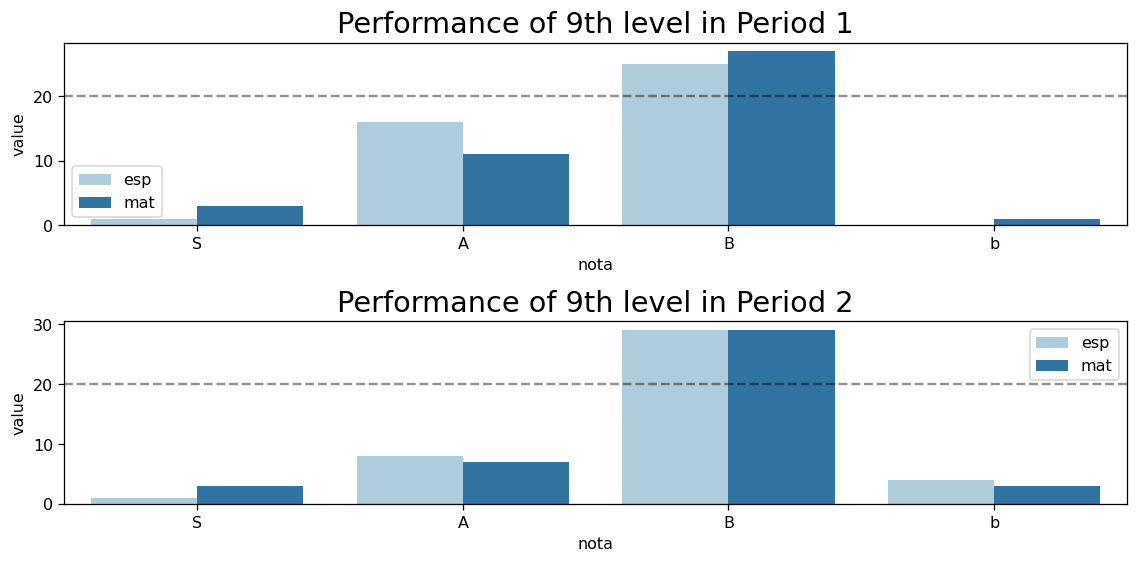

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), dpi=115)
summary_subject_plot(noveno_2[noveno_2['period'] == 1], size=(10, 4), cols=cols_9, palette='Paired', ax=ax1)
summary_subject_plot(noveno_2[noveno_2['period'] == 2], size=(10, 4), cols=cols_9, palette='Paired', ax=ax2)

# Style
ax1.axhline(y=20, xmin=0, xmax=1, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')
ax2.axhline(y=20, xmin=0, xmax=1, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')

ax1.set_title("Performance of 9th level in Period 1", fontsize=18)
ax2.set_title("Performance of 9th level in Period 2", fontsize=18)

plt.tight_layout()
plt.show()

In [27]:
titles_10 = ["10-1", "10-1", "10-2", "10-2", "10-3", "10-3", "10-4", "10-4"]
titles_11 = ["11-1", "11-1", "11-2", "11-2", "11-3", "11-3"]

In [28]:
analysis_for_10 = [
    decimo_1[decimo_1['period'] == 1],
    decimo_2[decimo_2['period'] == 1],
    decimo_3[decimo_3['period'] == 1],
    decimo_4[decimo_4['period'] == 1],
    decimo_1[decimo_1['period'] == 2],
    decimo_2[decimo_2['period'] == 2],
    decimo_3[decimo_3['period'] == 2],
    decimo_4[decimo_4['period'] == 2],
]

analysis_for_11 = [
    once_1[once_1['period'] == 1],
    once_2[once_2['period'] == 1],
    once_3[once_3['period'] == 1],
    once_1[once_1['period'] == 2],
    once_2[once_2['period'] == 2],
    once_3[once_3['period'] == 2],
]

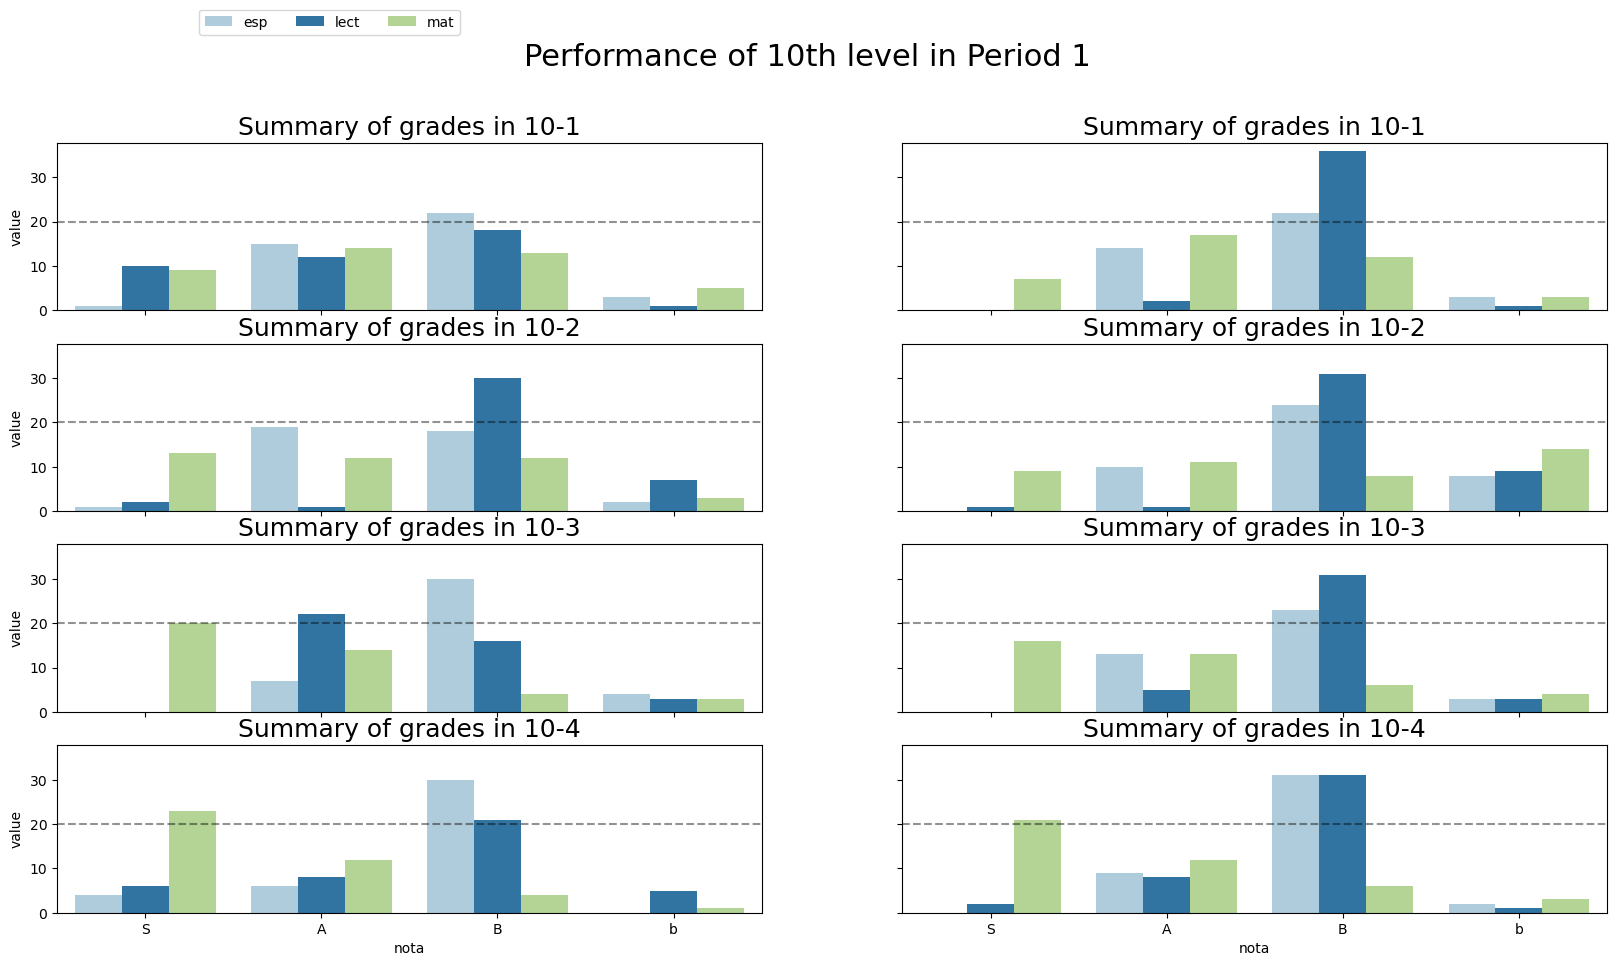

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(20, 10), sharex=True, sharey=True)
for ax, title, plot in zip(axes.flatten(), titles_10, analysis_for_10):
    summary_subject_plot(plot, palette='Paired', ax=ax, show_legend=False, size=(14, 14), cols=cols_growns)
    ax.set_title(f"Summary of grades in {title}", fontdict={"fontsize": 18})
    ax.axhline(y=20, xmin=0, xmax=1, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')

handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=4, bbox_to_anchor=(0.33, 1.02))

fig.tight_layout(rect=[0, 1, 1, 0.92])
plt.suptitle("Performance of 10th level in Period 1", fontsize=22)
plt.show()

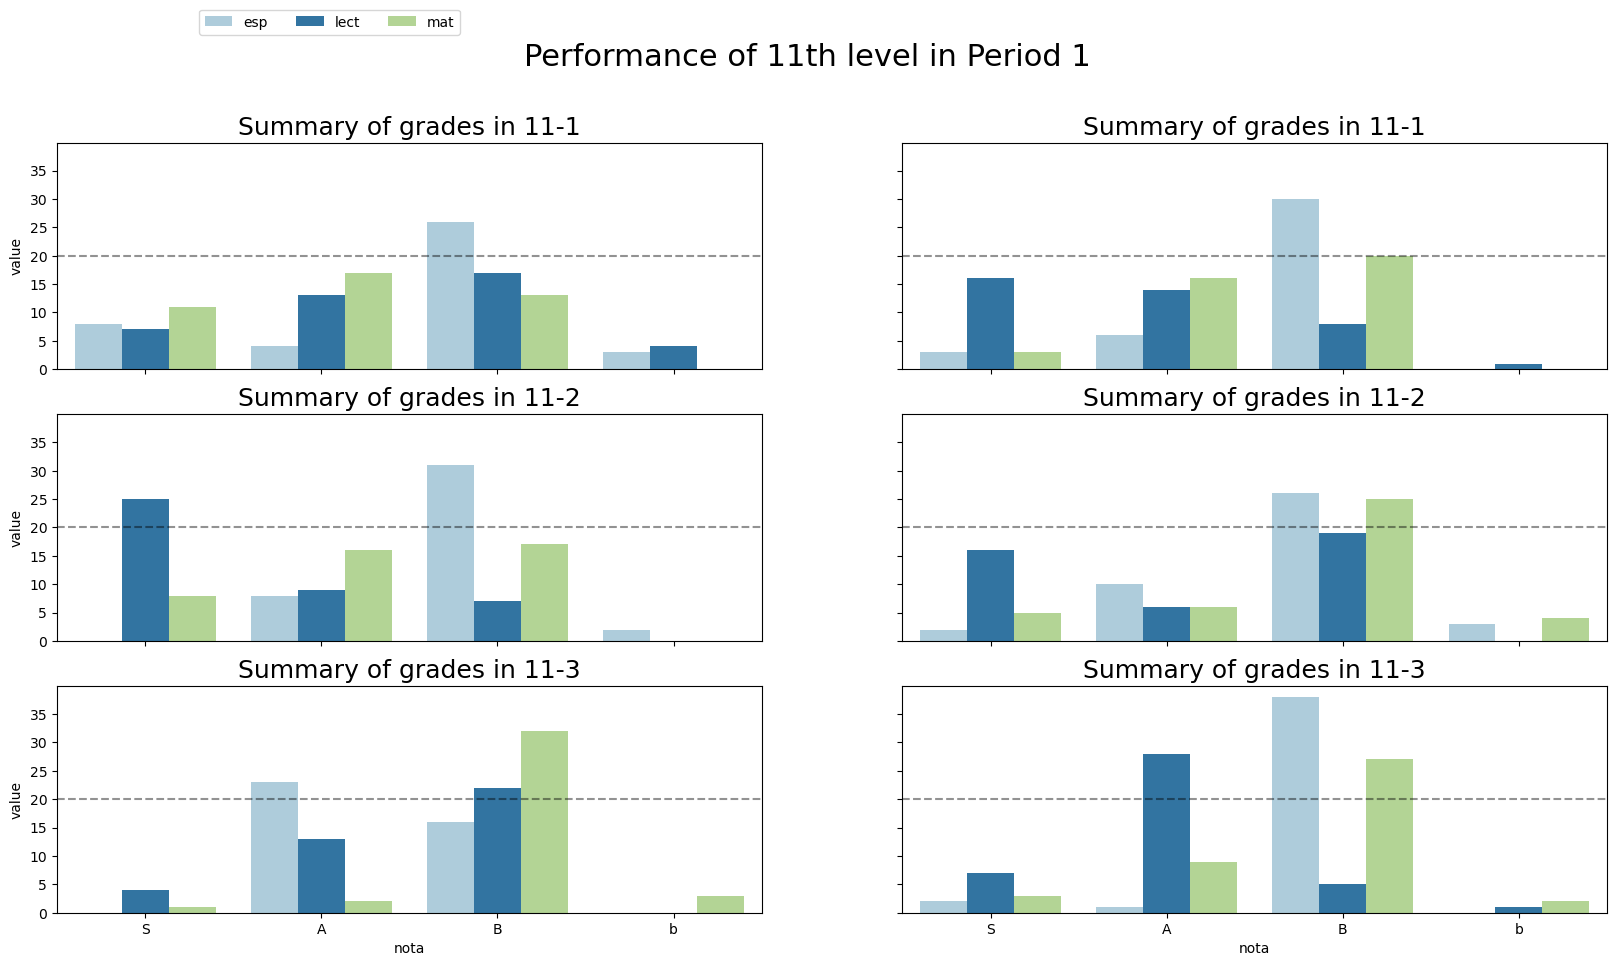

In [30]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10), sharex=True, sharey=True)
for ax, title, plot in zip(axes.flatten(), titles_11, analysis_for_11):
    summary_subject_plot(plot, palette='Paired', ax=ax, show_legend=False, size=(14, 14), cols=cols_growns)
    ax.set_title(f"Summary of grades in {title}", fontdict={"fontsize": 18})
    ax.axhline(y=20, xmin=0, xmax=1, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')

handles, labels = axes.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=4, bbox_to_anchor=(0.33, 1.02))

fig.tight_layout(rect=[0, 1, 1, 0.92])
plt.suptitle("Performance of 11th level in Period 1", fontsize=22)
plt.show()

### 1.3 Analysing student cumulated grades of every subject (Periods 1 and 2)

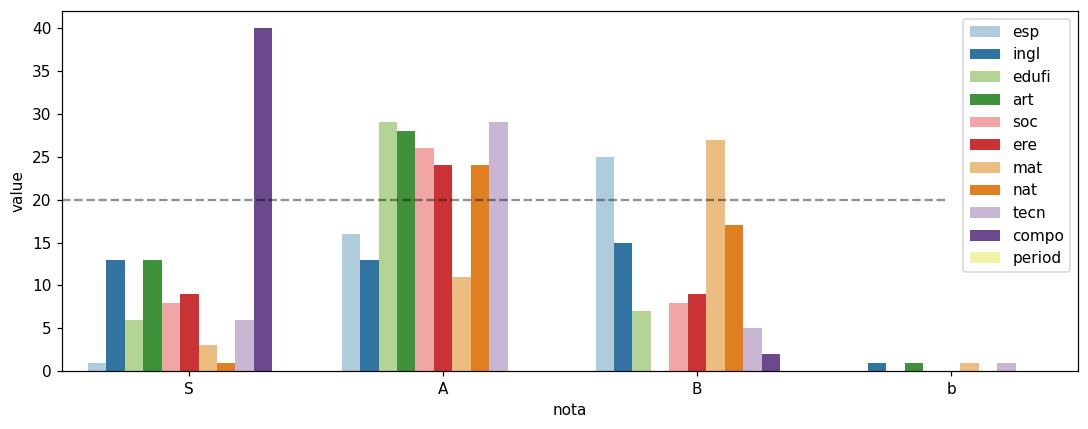

In [31]:
ax = summary_subject_plot(p1_9_2, palette='Paired', size=(10,4))
ax.axhline(y=20, xmin=0, xmax=0.87, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')
plt.show()

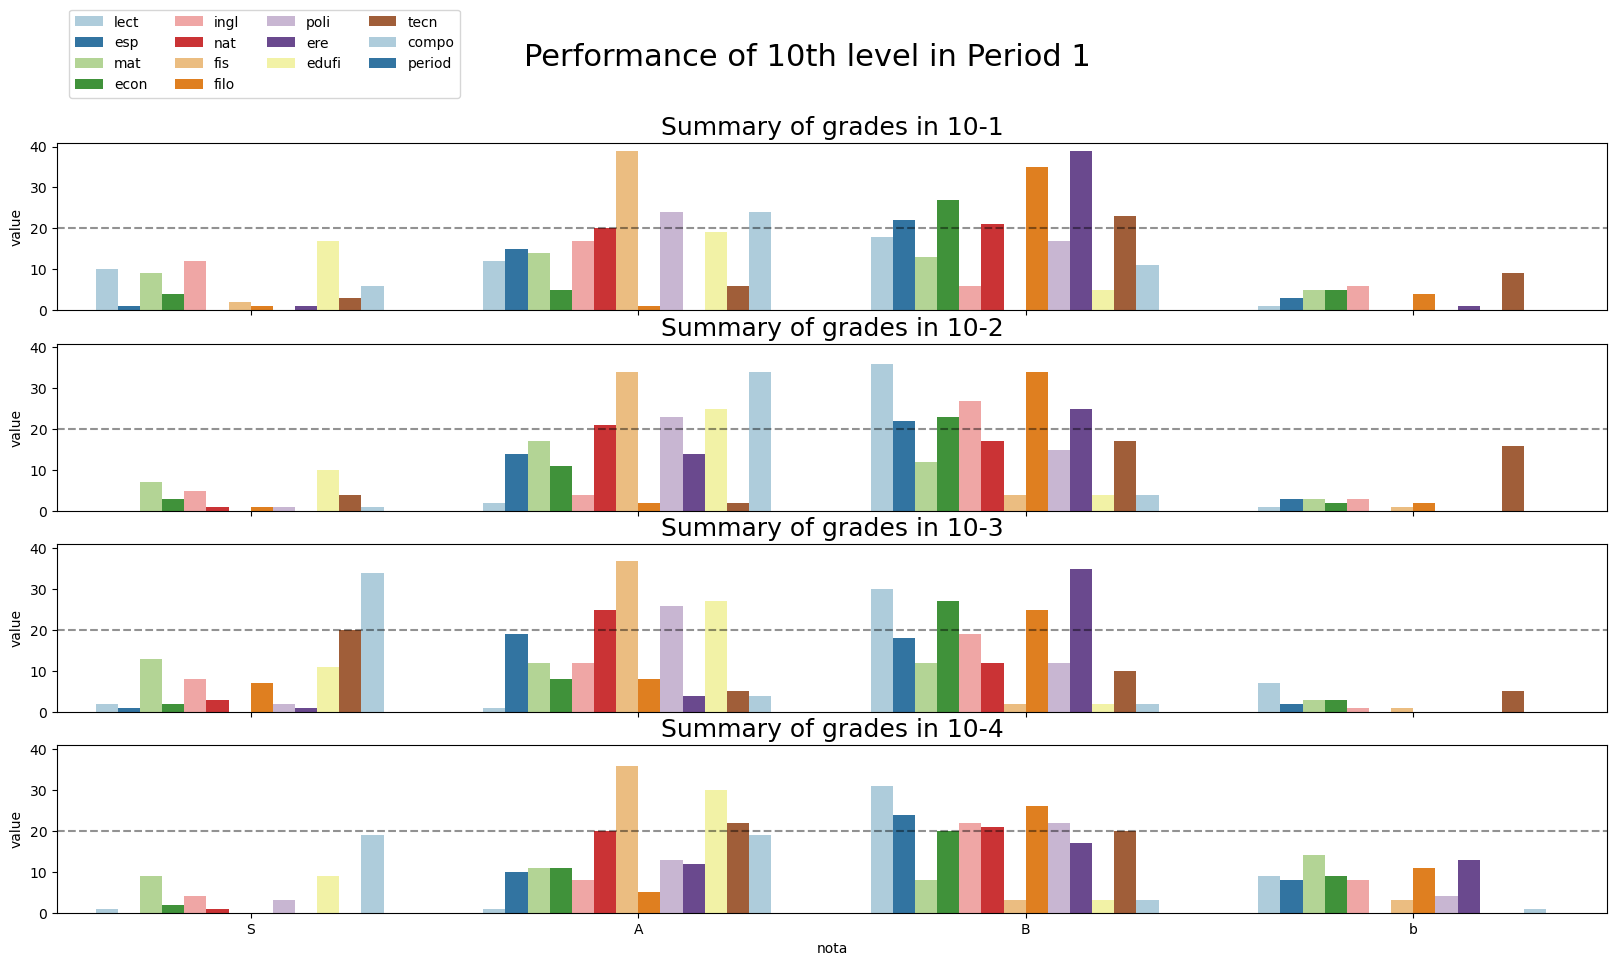

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(20, 10), sharex=True, sharey=True)
titles = ["10-1", "10-2", "10-3", "10-4"]
for ax, grades, title in zip(axes, [p1_10_1, p1_10_2, p1_10_3, p1_10_4], titles):
    summary_subject_plot(grades, palette='Paired', ax=ax, show_legend=False, size=(14, 14))
    ax.set_title(f"Summary of grades in {title}", fontdict={"fontsize": 18})
    ax.axhline(y=20, xmin=0, xmax=1, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=4, bbox_to_anchor=(0.33, 1.02))

fig.tight_layout(rect=[0, 1, 1, 0.92])
plt.suptitle("Performance of 10th level in Period 1", fontsize=22)
plt.show()


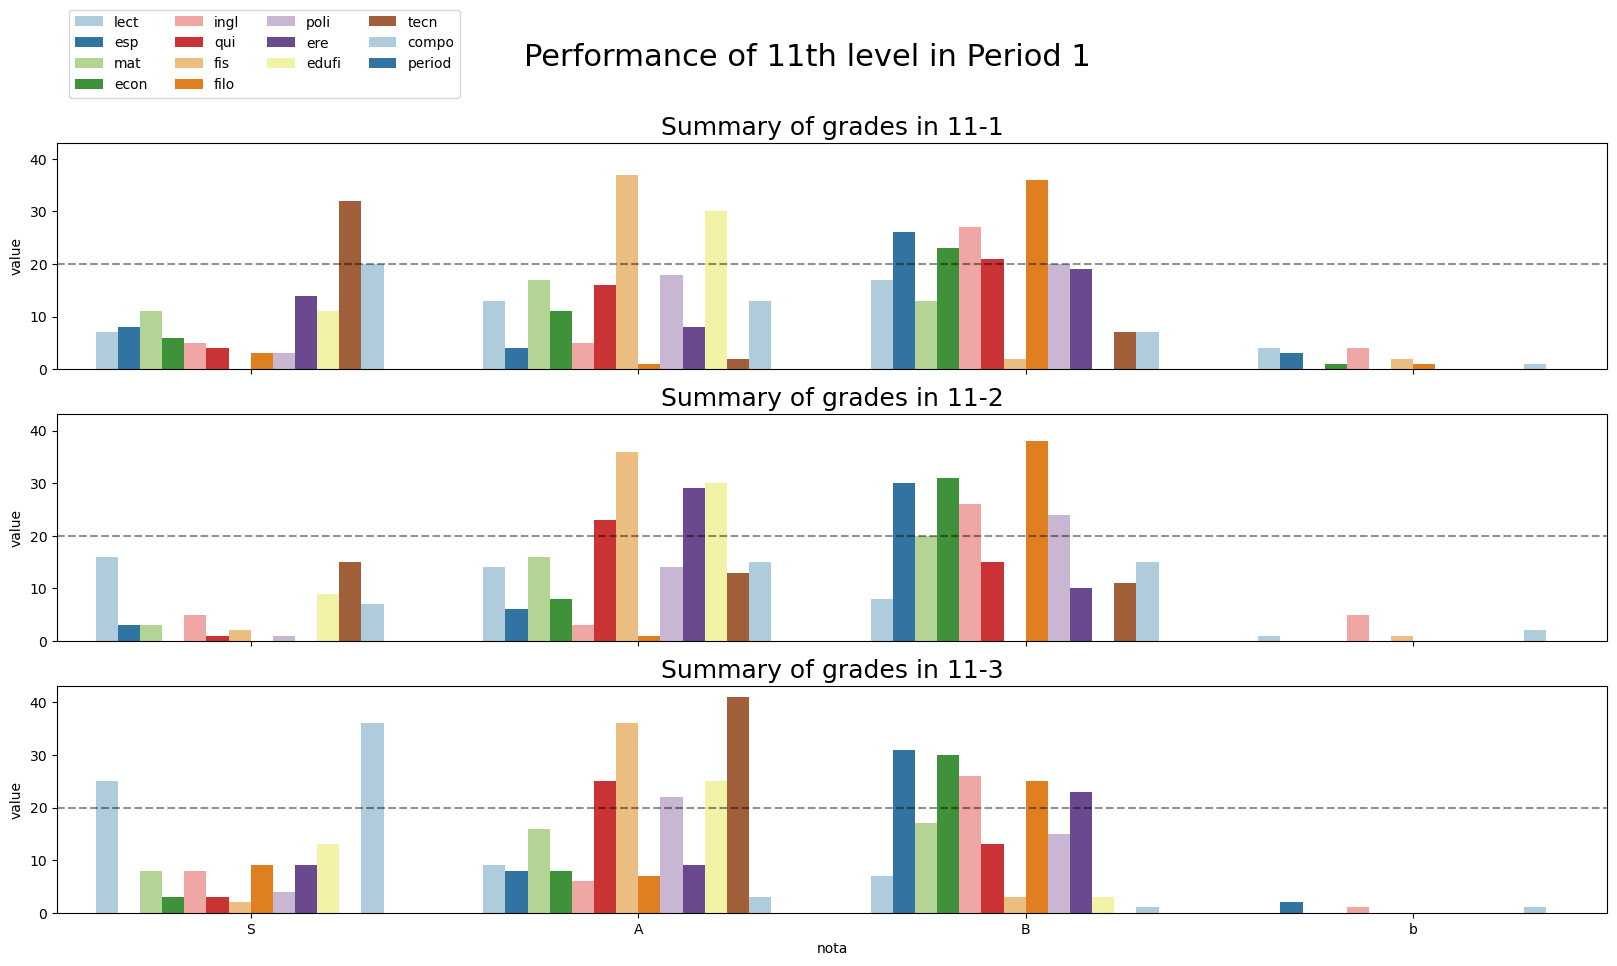

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10), sharex=True, sharey=True)
titles = ["11-1", "11-2", "11-3"]
for ax, grades, title in zip(axes, [p1_11_1, p1_11_2, p1_11_3], titles):
    summary_subject_plot(grades, palette='Paired', ax=ax, show_legend=False, size=(14, 14))
    ax.set_title(f"Summary of grades in {title}", fontdict={"fontsize": 18})
    ax.axhline(y=20, xmin=0, xmax=1, linestyle="--", linewidth=1.5, zorder=10, alpha=3/7, color='black')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", ncol=4, bbox_to_anchor=(0.33, 1.02))

fig.tight_layout(rect=[0, 1, 1, 0.92])
plt.suptitle("Performance of 11th level in Period 1", fontsize=22)
plt.show()


## 2. Analysis per subject type.

In [88]:
# 9th grade
an_9_2 = dft([pgc(p1_9_2), pgc(p2_9_2)], True)


In [89]:
# 10th grade
an_10_1 = dft([pgc(p1_10_1), pgc(p2_10_1)], True)
an_10_2 = dft([pgc(p1_10_2), pgc(p2_10_2)], True)
an_10_3 = dft([pgc(p1_10_3), pgc(p2_10_3)], True)
an_10_4 = dft([pgc(p1_10_4), pgc(p2_10_4)], True)

# 11th grade
an_11_1 = dft([pgc(p1_11_1), pgc(p2_11_1)], True)
an_11_2 = dft([pgc(p1_11_2), pgc(p2_11_2)], True)
an_11_3 = dft([pgc(p1_11_3), pgc(p2_11_3)], True)

In [90]:
# 9th grade
an_9_2['sub'] = '9-2'

# 10th grade
an_10_1['sub'] = '10-1'
an_10_2['sub'] = '10-2'
an_10_3['sub'] = '10-3'
an_10_4['sub'] = '10-4'

# 11th grade
an_11_1['sub'] = '11-1'
an_11_2['sub'] = '11-2'
an_11_3['sub'] = '11-3'

In [91]:
wrap_10 = pd.melt(
    frame=pd.concat(
        [an_10_1, an_10_2, an_10_3, an_10_4]
    ),
    id_vars=['sub', 'period']
    )

wrap_10 = wrap_10[wrap_10['variable'] == 'performance']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


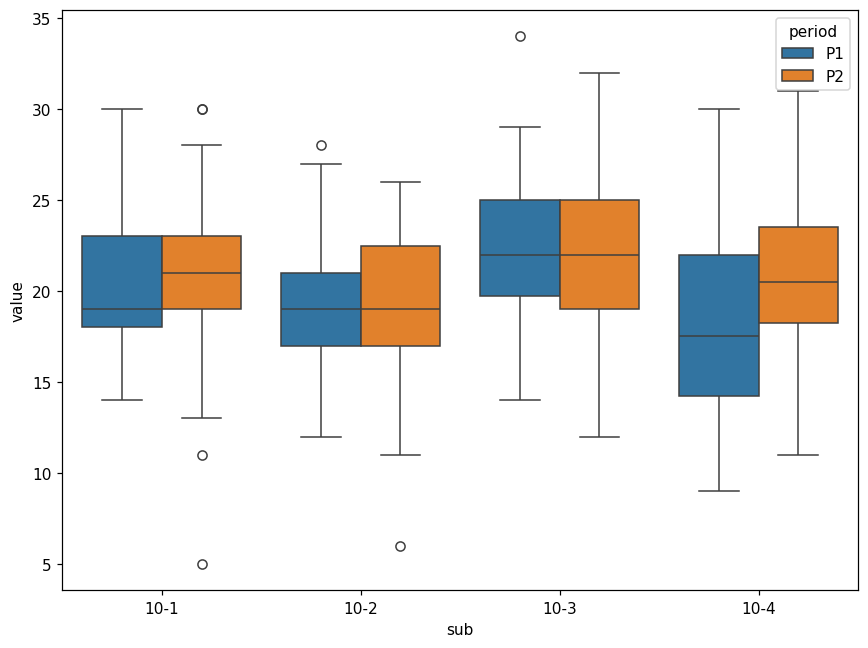

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=110)
sns.boxplot(data=wrap_10, y='value', x='sub', hue='period', ax=ax, showfliers=True)
plt.tight_layout()
plt.show()

### Test with 11

In [71]:
wrap_11 = pd.melt(
    frame=pd.concat(
        [an_11_1, an_11_2, an_11_3]
    ),
    id_vars=['sub', 'period']
)

wrap_11 = wrap_11[wrap_11['variable'] == 'performance']

In [72]:
wrap_10.value = wrap_10.value.astype('int')
wrap_11.value = wrap_11.value.astype('int')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


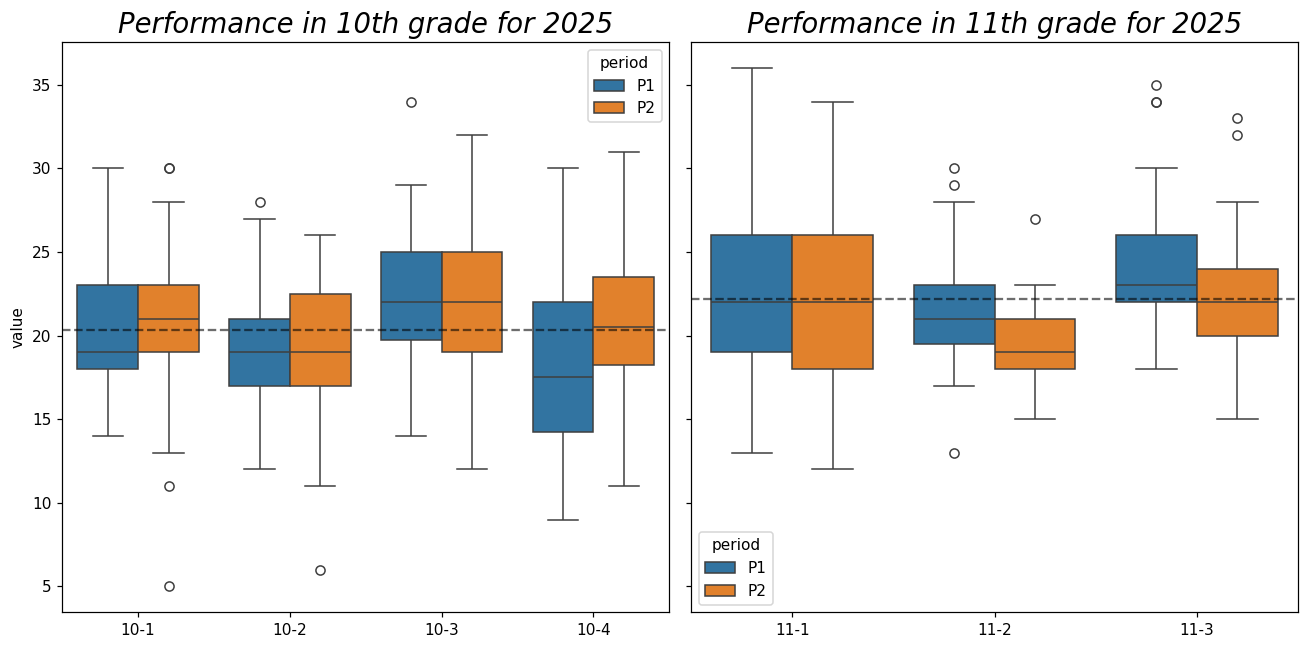

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=110, sharey=True)
sns.boxplot(data=wrap_10, y='value', x='sub', hue='period', ax=ax1, showfliers=True)
sns.boxplot(data=wrap_11, y='value', x='sub', hue='period', ax=ax2, showfliers=True)


ax1.axhline(y=wrap_10.mean(numeric_only=True).values[0], xmin=0, xmax=1, linestyle='--', color='black', alpha=4/7)
ax1.set_title("Performance in 10th grade for 2025", fontdict={"size":18, "style" : "italic"})
ax1.set_xlabel(None)
ax2.axhline(y=wrap_11.mean(numeric_only=True).values[0], xmin=0, xmax=1, linestyle='--', color='black', alpha=4/7)
ax2.set_title("Performance in 11th grade for 2025", fontdict={"size":18, "style" : "italic"})
ax2.set_xlabel(None)


plt.tight_layout()
plt.show()

In [74]:
print(f"Average performance in 10th level is {wrap_10.mean(numeric_only=True).values[0]:.1f}")
print(f"Average performance in 11th level is {wrap_11.mean(numeric_only=True).values[0]:.1f}")

Average performance in 10th level is 20.3
Average performance in 11th level is 22.2


In [75]:
test_10 = pd.concat(
    objs=[an_10_1, an_10_2, an_10_3, an_10_4],
    axis=0
)

test_10['fund'] = test_10[['lect', 'esp', 'mat']].sum(axis=1)

In [76]:
test_11 = pd.concat(
    objs=[an_11_1, an_11_2, an_11_3],
    axis=0
)

test_11['fund'] = test_11[['lect', 'esp', 'mat']].sum(axis=1)

In [77]:
corr_10_matrix = test_10[test_10.columns[3:17].tolist() + ['fund']].corr(numeric_only=True).iloc[13: , :13]

In [78]:
corr_11_matrix = test_11[test_11.columns[3:17].tolist() + ['fund']].corr(numeric_only=True).iloc[13:, :13]

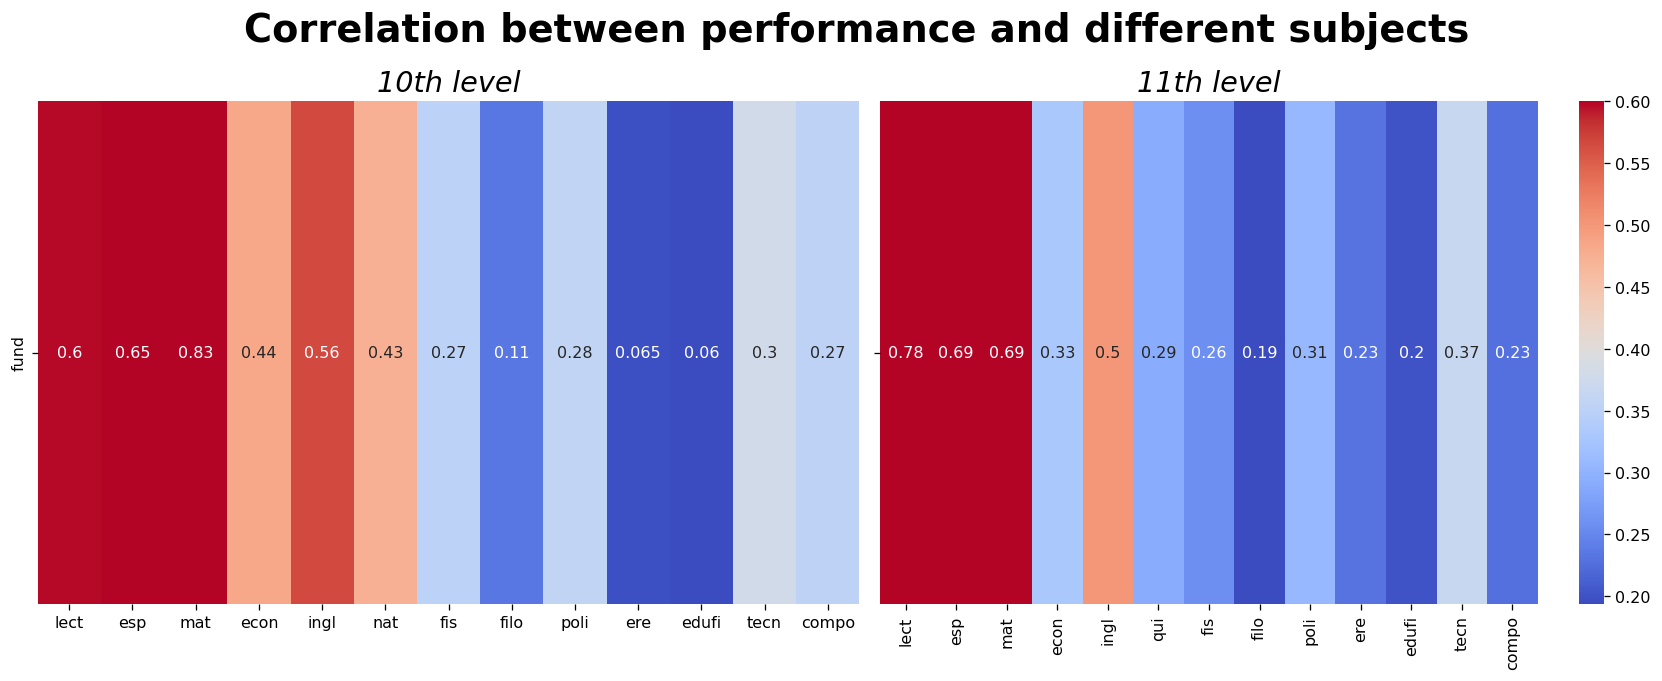

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), dpi=115, sharey=True)
sns.heatmap(
    data=corr_10_matrix,
    cmap='coolwarm',
    vmax=0.6,
    annot=True,
    ax=axes.flatten()[0],
    cbar=False
)
axes.flatten()[0].set_title("10th level", fontdict={"size" : 18, "style" : "italic"})

sns.heatmap(
    data=corr_11_matrix,
    cmap='coolwarm',
    vmax=0.6,
    annot=True,
    ax=axes.flatten()[1],
    cbar=True
)

axes.flatten()[1].set_title("11th level", fontdict={"size" : 18, "style" : "italic"})
plt.suptitle("Correlation between performance and different subjects", size=24, weight='bold')
plt.tight_layout()
plt.show()

In [48]:
smf.ols(
    formula="performance ~ fund + ingl", # These subjects have more weight respect to academic subjects.
    data=test_10
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     455.0
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           2.02e-94
Time:                        18:49:45   Log-Likelihood:                -734.19
No. Observations:                 324   AIC:                             1474.
Df Residuals:                     321   BIC:                             1486.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2568      0.373     27.534      0.000       9.524      10.990
fund           1.6921      0.095     17.791      0.000       1.505       1.879
ingl           1.7848      0.172     10.374      0.000       1.446       2.123
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.063
Skew:                          -0.033   Prob(JB):                        0.969
Kurtosis:                       3.014   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
smf.ols(
    formula="performance ~ fund + ingl", # These subjects have more weight respect to academic subjects.
    data=test_11
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     366.4
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.61e-73
Time:                        18:49:45   Log-Likelihood:                -534.05
No. Observations:                 242   AIC:                             1074.
Df Residuals:                     239   BIC:                             1085.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1142      0.442     25.131      0.000      10.243      11.985
fund           1.7513      0.101     17.299      0.000       1.552       1.951
ingl           2.0224      0.216      9.374      0.000       1.597       2.447
==============================================================================
Omnibus:                        0.105   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.218
Skew:                          -0.033   Prob(JB):                        0.897
Kurtosis:                       2.869   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
an_9_2.reset_index().drop(columns={'index', 'idx'}, inplace=True)

In [114]:
an_10 = pd.concat(
    objs=[an_10_1, an_10_2, an_10_3, an_10_4],
    axis=0,
    # verify_integrity=True
)

an_10.reset_index().drop(columns={'index', 'idx'}, inplace=True)

corr_subj_10 = an_10.iloc[:, 4:17].corr(numeric_only=True)

In [131]:
an_10 = an_10.rename_column(new_column_name="qui", old_column_name="nat")

In [132]:
an_11 = pd.concat(
    objs=[an_11_1, an_11_2, an_11_3],
    axis=0
)

an_11.reset_index().drop(columns={'index', 'idx'}, inplace=True)

corr_subj_11 = an_11.iloc[:, 4:17].corr(numeric_only=True)

In [133]:
an = pd.concat(
    objs=[an_10, an_11],
    axis=0
)

In [134]:
an.isna().sum()

idx                0
codigo             0
nombre             0
period             0
lect               0
esp                0
mat                0
econ               0
ingl               0
qui                0
fis                0
filo               0
poli               0
ere                0
edufi              0
tecn               0
compo              0
performance        0
fundamental        0
performance_pct    0
band               0
sub                0
dtype: int64

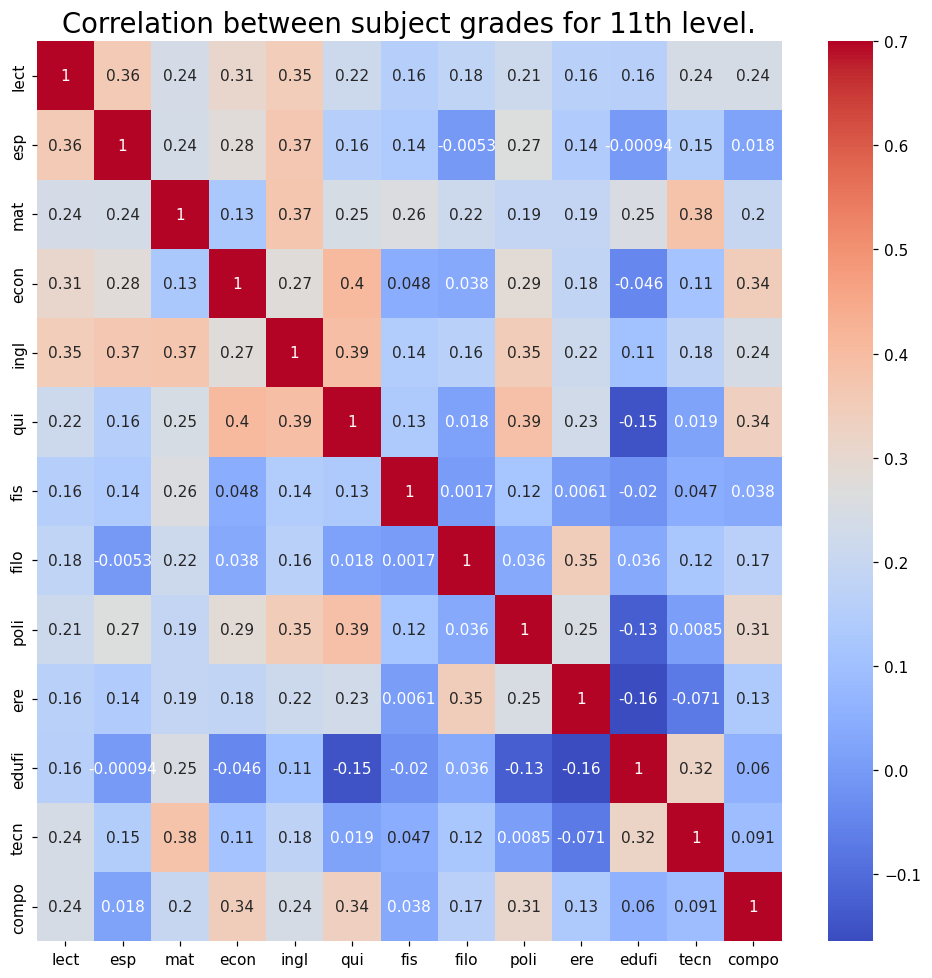

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9), dpi=110)
sns.heatmap(
    data=corr_subj_11,
    vmax=0.7,
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation between subject grades for 11th level.", fontdict={"size": 18})
plt.tight_layout()
plt.show()

In [143]:
corr_subj = an.select_columns(
    'lect', 'esp', 'ingl', 'mat', 'qui', 'fis', 'filo', 'econ', 'poli', 'tecn', 'edufi', 'ere', 'compo', 'fundamental', 'performance'
).corr(numeric_only=True, method='pearson').fillna(method='bfill')

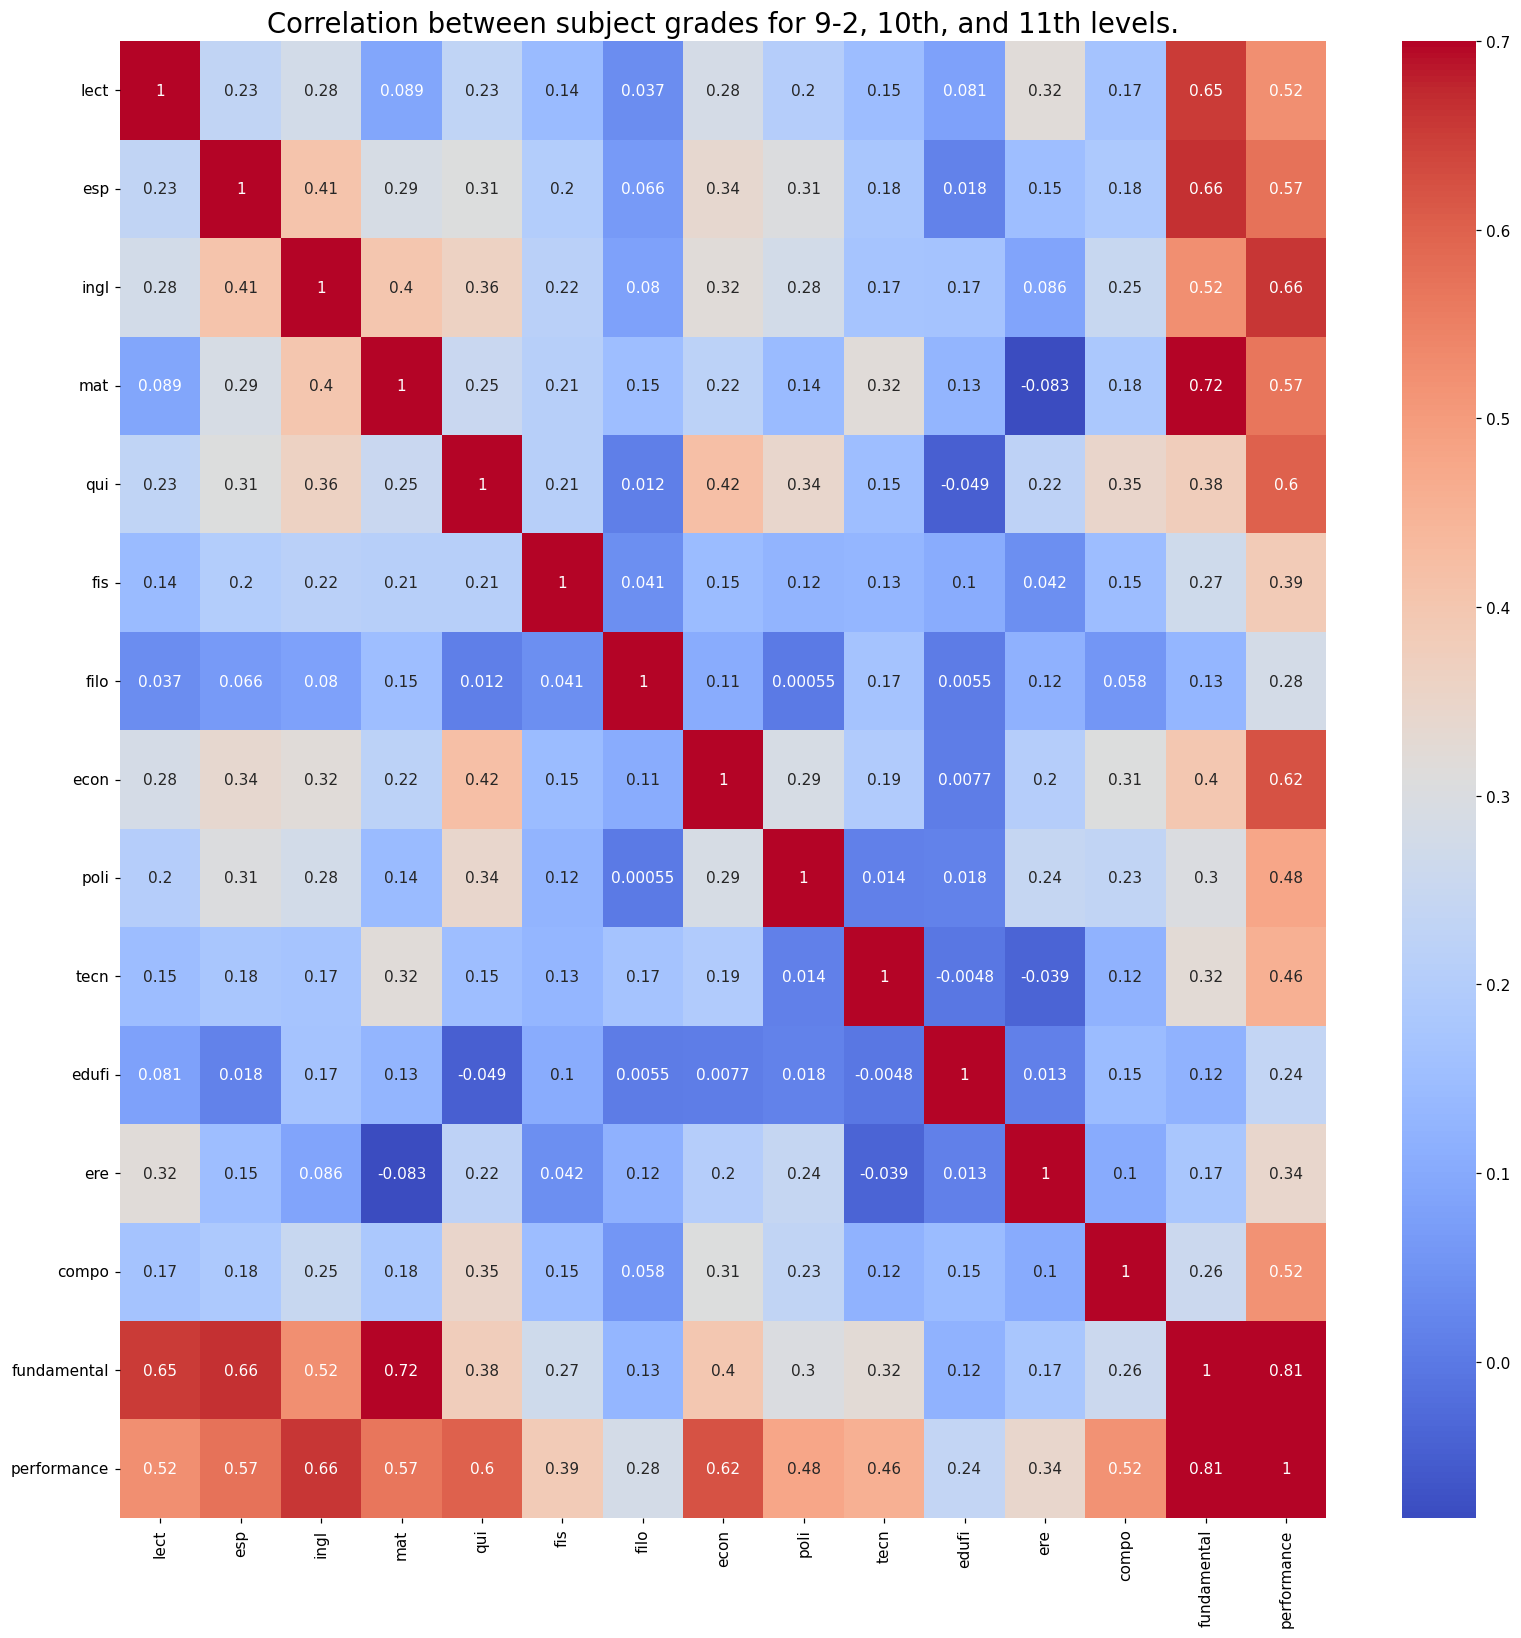

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15), dpi=110)
sns.heatmap(
    data=corr_subj,
    vmax=0.7,
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation between subject grades for 9-2, 10th, and 11th levels.", fontdict={"size": 18})
plt.tight_layout()
plt.show()

In [147]:
smf.ols(
    data=an,
    formula='performance ~ fundamental + ingl'
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            performance   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     764.0
Date:                Sat, 18 Oct 2025   Prob (F-statistic):          3.90e-161
Time:                        19:26:09   Log-Likelihood:                -1296.0
No. Observations:                 566   AIC:                             2598.
Df Residuals:                     563   BIC:                             2611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.4755      0.297     35.244      0.000       9.892      11.059
fundamental     1.7960      0.072     24.975      0.000       1.655       1.937
ingl            1.7385      0.139     12.510      0.000       1.466       2.011
==============================================================================
Omnibus:                        0.487   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.433
Skew:                          -0.067   Prob(JB):                        0.805
Kurtosis:                       3.014   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""